In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
pd.options.display.width = 100

In [177]:
dataset = pd.read_csv("pid_combined.csv")
#print(dataset.head(1))
len_of_datset = len(dataset)
print(len_of_datset)
dataset.head()
#dataset.groupby(by="participant_id").size()

1216


,word_1,word_2,condition,WUP_score,correct_incorrect,key_pressed,response_status,reaction_time,age_list,participant_id
0,bread,utrtbe,3,0.00,0,n,1,1389.216185,18,1
1,bread,laptop,4,0.20,1,y,1,1108.018875,18,1
2,engine,tairn,2,0.00,0,n,1,1035.490990,18,1
3,doctor,shampoo,4,0.21,1,y,1,937.063217,18,1
4,engine,train,1,0.63,1,y,1,1017.201900,18,1


In [178]:
dataset.groupby(by='response_status').sum()

,condition,WUP_score,correct_incorrect,reaction_time,age_list,participant_id
response_status,,,,,,
0,407,26.59,49,1.999271e+05,3839,1560
1,2518,276.33,539,1.084960e+06,20038,8407
2,115,10.52,20,9.600000e+04,975,369


## Data Exploration

### About participants
#### Average age distribution

In [179]:
# Average age of participants
groupby_age = dataset.groupby(by=['age_list'])
age_distribution = (groupby_age.size()/76).astype('int')
average_age = sum(age_distribution*age_distribution.index)/sum(age_distribution)
#int(age_distribution)
#print(age_distribution)

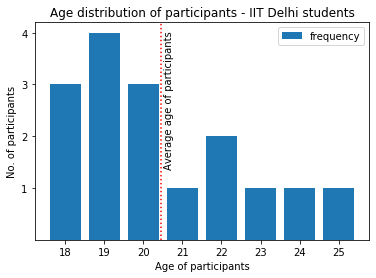

In [180]:
plt.axvline(average_age, color='red', ls='dotted', label='_nolegend_')
plt.text(average_age+0.1,1.4,'Average age of participants',rotation=90)
plt.xlabel("Age of participants")
plt.ylabel("No. of participants")
plt.yticks(range(1,5))
plt.bar(age_distribution.index, age_distribution)
plt.legend(["frequency"])
plt.title("Age distribution of participants - IIT Delhi students")
plt.show()

           WUP_score  correct_incorrect  response_status  reaction_time  age_list  participant_id
condition                                                                                        
1           0.748947                1.0         0.934211    1110.520881   20.4375             8.5
2           0.000000                0.0         0.680921    1165.908053   20.4375             8.5
3           0.000000                0.0         0.953947    1149.840821   20.4375             8.5
4           0.282105                1.0         0.970395    1116.120709   20.4375             8.5


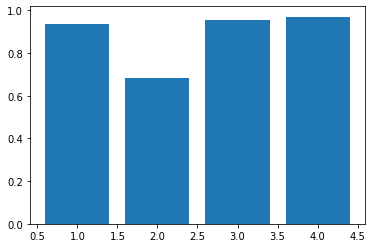

In [181]:
### Count of response(0, 1, 2) Vs 4 conditions
groupby_condition = dataset.groupby(by=['condition']).mean()
print(groupby_condition)
#condi = (groupby_age.size()/76).astype('int')
#average_age = sum(age_distribution*age_distribution.index)/sum(age_distribution)
#plt.axvline(average_age, color='red', ls='dotted', label='_nolegend_')
#plt.text(average_age+0.1,1.4,'Average age of participants',rotation=90)
# plt.xlabel("Age of participants")
# plt.ylabel("No. of participants")
#plt.yticks(range(1,5))
plt.bar(groupby_condition.index, groupby_condition['response_status'])#, groupby_condition)
# plt.legend(["frequency"])
# plt.title("Age distribution of participants - IIT Delhi students")
plt.show()

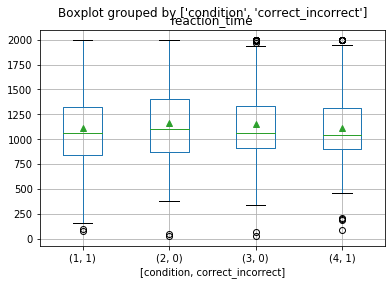

In [182]:
# groupby_condition_response_status = dataset.groupby(by=['condition', 'reaction_time'])
# groupby_condition_response_status_mean = groupby_condition_response_status#.mean()
#plt.boxplot(vals, labels=names)
#dataset.boxplot(column = ['response_status'], by=['condition'])#['reaction_time']

# palette = ['r', 'g', 'b', 'y']
# for x, val, c in zip(xs, vals, palette):
#     plt.scatter(x, val, alpha=0.4, color=c)
    
dataset.boxplot(column = ['reaction_time'], by=['condition', 'correct_incorrect'], showmeans=True)#['reaction_time']
#dataset.groupby(by=['participant_id', 'correct_incorrect']).count()#['correct_incorrect']
#plt.show()
#groupby_condition_response_status_mean['response_status'].boxplot()

In [183]:
# #groupby_condition_response_status.indices
# for name in groupby_condition_response_status.indices:
#     print (name)
#     print (groupby_condition_response_status[name])

In [184]:
# Sanity check
#groupby_condition_rt.count()

In [185]:
# CrossTab condition Vs Response

crosstab_condition_response_status = pd.crosstab(dataset['condition'], [dataset['response_status'], 
                                                                       dataset['participant_id']])#.plot.bar()
crosstab_condition_response_status = crosstab_condition_response_status/16#.plot.bar()
#plt.clf()
print(crosstab_condition_response_status.mean)
# #crosstab_condition_response_status.mean.plot.bar()
# plt.xlabel("Conditions and respective responses")
# plt.ylabel("Average response per participant")
#plt.legend(["frequency"])


<bound method DataFrame.mean of response_status       0                                                                          \
participant_id       1       2       3       4       5       6       7       8       9       10   
condition                                                                                         
1                0.4375  0.1250  0.1250  0.1250  0.1250  0.0000  0.1250  0.0625  0.1250  0.0000   
2                0.4375  0.5000  0.3125  0.5625  0.5000  0.7500  0.3125  0.2500  0.3750  0.3125   
3                0.1250  0.1875  0.0625  0.0000  0.0625  0.0625  0.0000  0.0000  0.1875  0.0625   
4                0.0000  0.0625  0.1250  0.0625  0.0625  0.1250  0.1250  0.1250  0.0000  0.0000   

response_status  ...       2                                                                  \
participant_id   ...      5       7       8       9       10      11      12      13      14   
condition        ...                                                              

In [186]:
dataset = pd.read_csv("pid_combined.csv")
#dataset['response_status']
dataset['response_status']=dataset['response_status'].apply(lambda row:0 if row==2 else row)

In [187]:
len(dataset)

1216

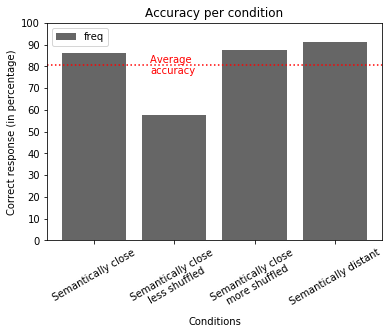

In [215]:
groupby_condition = dataset.groupby(by=['condition']).mean()*100
#dataset.boxplot(column = ['reaction_time'], by=['condition'], showmeans=True)#['reaction_time']

plt.bar(groupby_condition.index, groupby_condition['response_status'], color='#666666')#, groupby_condition)
# plt.legend(["frequency"])
# plt.title("Age distribution of participants - IIT Delhi students")
avg_response = dataset.groupby(by=['condition']).mean()*100
avg_response = avg_response['response_status'].mean()
plt.axhline(avg_response, color='red', ls='dotted', label='_nolegend_')
plt.text(1.7,76.5,'Average \naccuracy', color='red')
plt.xlabel("Conditions")
plt.ylabel("Correct response (in percentage)")
#plt.xticks(['a', 'b', 'c', 'd'])
x_labels =['Semantically close', 'Semantically close\nless shuffled', 
           'Semantically close\nmore shuffled', 'Semantically distant']
plt.xticks(range(1,5), x_labels, rotation=30)
plt.yticks(range(0,110, 10))
# plt.bar(age_distribution.index, age_distribution)
plt.legend(["freq"])
plt.title("Accuracy per condition")
plt.show()

In [172]:
dataset = pd.read_csv("pid_combined.csv")
#dataset['response_status']
dataset['reaction_time']=dataset['reaction_time'].apply(lambda :-1 if row[]"status_response"==2 else row)
# min(dataset['reaction_time'])
dataset = dataset[dataset['reaction_time'] != -1]
print(len(dataset))

TypeError: <lambda>() takes 0 positional arguments but 1 was given

In [171]:
len(dataset['response_status']==-1)

1168

In [153]:
groupby_condition = dataset.groupby(by=['condition']).mean()*100
#dataset.boxplot(column = ['reaction_time'], by=['condition'], showmeans=True)#['reaction_time']

plt.bar(groupby_condition.index, groupby_condition['response_status'], color='#999999')#, groupby_condition)
# plt.legend(["frequency"])
# plt.title("Age distribution of participants - IIT Delhi students")
# plt.axvline(average_age, color='red', ls='dotted', label='_nolegend_')
# plt.text(average_age+0.1,1.4,'Average age of participants',rotation=90)
plt.xlabel("Conditions")
plt.ylabel("Correct response (in percentage)")
#plt.xticks(['a', 'b', 'c', 'd'])
x_labels =['Semantically close', 'Semantically close\nless shuffled', 
           'Semantically close\nmore shuffled', 'Semantically distant']
plt.xticks(range(1,5), x_labels, rotation=30)
plt.yticks(range(0,110, 10))
# plt.bar(age_distribution.index, age_distribution)
plt.legend(["freq"])
plt.title("Accuracy per condition")
plt.show()

TypeError: boxplot() got an unexpected keyword argument 'by'